# Análisis de una tienda online videojuegos
El presente proyecto tiene como objetivo identificar patrones que determinen si un juego tiene éxito o no, y con esto, poder determinar proyectos prometedores y planifica campañas publicitarias

## Revisión y preparación del dataset

In [64]:
#Importar librerias necesarias para el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Abrir el dataset con el comportamiento de las ventas

sales = pd.read_csv('/Users/dvillanueva/Data_science/Tripleten/Sprint6/games.csv')

In [65]:
# Imprimir las primeras 5 filas del dataset
sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [66]:
# Poner los nombres de las columnas en minúsculas
sales.columns = sales.columns.str.lower()


In [67]:
# Revisar que se haya hecho el cambio de las columnas a minúsculas
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [68]:
# Revisar los data types de las columnas y la cantidad de datos faltantes
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se puede apreciar que a la columna name y genre solamente tienen dos valores NaN, vamos revisar su información

In [69]:
# Revisar datos faltantes columna name y genre
na_name = sales[sales["name"].isna()]
na_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


La columna name y genre comparten que cuando a una le hace falta un valor a la otra también, inclusive también en las columnas que comparte como critic_score, user_score y rating. Entonces, considero que es valido eliminar esas dos filas de nuestra dataset.

In [70]:
#Eliminar los datos faltantes de la columna name y genre
sales = sales.dropna(subset=['name', 'genre'])

In [71]:
# Revisar que se hayan eliminado los datos NaN
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Al eliminar las dos filas nos quedamos con un dataset de 16713 filas

In [72]:
# Revisar los datos faltantes de la columna year_of_release
na_year_of_release = sales[sales["year_of_release"].isna()]
na_year_of_release.sample(10)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12235,National Geographic Challenge!,X360,NaN,Misc,0.06,0.00,0.00,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
12718,Flip's Twisted World,Wii,NaN,Platform,0.05,0.00,0.00,0.00,47.0,tbd,E
10486,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
4437,Super Breakout,2600,NaN,Puzzle,0.41,0.03,0.00,0.00,NaN,NaN,NaN
14325,Beyond the Labyrinth,3DS,NaN,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14769,Super Duper Sumos,GBA,NaN,Action,0.02,0.01,0.00,0.00,57.0,tbd,E
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.00,0.00,0.01,60.0,3.6,T


In [73]:
# Revisar los datos de la colmuna name que tengan la palabra Maddren NFL 2004
madden_game = sales[sales["name"]== "Madden NFL 2004"]
madden_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Apreciamos como en la fila donde esta el dato NaN en la columna year_of_release otras filas si tienen dato y practicamente el mismo. Es posible, que esta tendencia se repita en todos los datos NaN que se tienen en la columna year_of_release. Buscare un metodo para poder rellenar esos datos con la información de sus similares

In [74]:
# Función para llenar los datos NaN de la columna year_of_release con la moda
def fill_with_mode(x):
    if x.mode().empty or pd.isna(x.mode().iloc[0]):
        return x.fillna(0)
    else:
        return x.fillna(x.mode().iloc[0])

sales['year_of_release'] = sales.groupby('name')['year_of_release'].transform(fill_with_mode)

In [75]:
# Revisar que se hayan llenado los datos NaN
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [76]:
# Revisar que el valor NaN de la columna year_of_release se haya llenado con la moda
madden_game = sales[sales["name"]== "Madden NFL 2004"]
madden_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [77]:
# Revisar los NaN de la columna critic_score
na_critic_score = sales[sales["critic_score"].isna()]
na_critic_score.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7670,Backyard Hockey,GBA,2003.0,Sports,0.14,0.05,0.00,0.00,NaN,tbd,E
12366,Chou Gekijouban Keroro Gunsou 3: Tenkuu Daibou...,DS,2008.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
9825,Shin Megami Tensei: Devil Survivor 2,3DS,2015.0,Role-Playing,0.00,0.02,0.09,0.00,NaN,NaN,NaN
10230,Famicom Mini: Famicom Tantei Club - Kieta Kouk...,GBA,2004.0,Adventure,0.00,0.00,0.11,0.00,NaN,NaN,NaN
12899,Hakuouki: Reimeiroku,PS2,2010.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
3118,Disney Infinity 2.0: Marvel Super Heroes,WiiU,2014.0,Action,0.37,0.22,0.00,0.06,NaN,NaN,NaN
6116,F/A-18F Super Hornet,GBA,2004.0,Simulation,0.20,0.08,0.00,0.01,NaN,NaN,NaN
6178,Shrek: Ogres & Dronkeys,DS,2007.0,Simulation,0.26,0.00,0.00,0.02,NaN,NaN,NaN
4999,Phoenix Wright: Ace Attorney - Dual Destinies,3DS,2013.0,Adventure,0.00,0.00,0.38,0.00,NaN,NaN,NaN
9072,Mary-Kate and Ashley: Winners Circle,PS,2001.0,Action,0.08,0.05,0.00,0.01,NaN,NaN,NaN


In [78]:
# Revisar el comportamiento de la columna critic_score
group_critic_score = na_critic_score.groupby('year_of_release')['critic_score'].count()
group_critic_score

year_of_release
0.0       0
1980.0    0
1981.0    0
1982.0    0
1983.0    0
1984.0    0
1985.0    0
1986.0    0
1987.0    0
1988.0    0
1989.0    0
1990.0    0
1991.0    0
1992.0    0
1993.0    0
1994.0    0
1995.0    0
1996.0    0
1997.0    0
1998.0    0
1999.0    0
2000.0    0
2001.0    0
2002.0    0
2003.0    0
2004.0    0
2005.0    0
2006.0    0
2007.0    0
2008.0    0
2009.0    0
2010.0    0
2011.0    0
2012.0    0
2013.0    0
2014.0    0
2015.0    0
2016.0    0
Name: critic_score, dtype: int64

Revisando la columna de critic_score practicamente todos los valores NaN o son de juegos muy antiguos o que las ventas fueron practicamente nulas. Puede ser que este sistema de ranking de video juegos se implemento en cierta epoca y por eso los mas antiguos no lo tienen, y por el lado de las ventas, fueron tan bajas que ni siqueira hubo un ranking al respecto

In [79]:
# Rellenar los valores NaN de la columna critic_score y user_score con cero
sales['critic_score'] = sales['critic_score'].fillna(0)
sales['user_score'] = sales['user_score'].fillna(0)

In [80]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,NaN


In [81]:
# Revisar que se hayan rellenado los valores NaN
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [82]:
# Revisar los datos de la columna user_score
tbd = sales[sales["user_score"] == "tbd"]
tbd.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1292,Disney Princess,GBA,2003.0,Platform,1.04,0.37,0.0,0.06,0.0,tbd,E
6385,Just Dance Kids 2,Wii,2011.0,Misc,0.25,0.00,0.0,0.02,0.0,tbd,E
16421,Tringo,GBA,2006.0,Puzzle,0.01,0.00,0.0,0.00,0.0,tbd,E
15534,Chuck E. Cheese's Super Collection,Wii,2011.0,Action,0.02,0.00,0.0,0.00,0.0,tbd,E
7660,Tetris Worlds (Online Edition),XB,2003.0,Puzzle,0.15,0.04,0.0,0.01,62.0,tbd,E
10538,Hot Wheels Ultimate Racing,PSP,2007.0,Action,0.09,0.00,0.0,0.01,60.0,tbd,E
7192,Duel Masters: Kaijudo Showdown,GBA,2004.0,Misc,0.16,0.06,0.0,0.00,66.0,tbd,E
9261,Alvin and the Chipmunks,DS,2007.0,Misc,0.12,0.00,0.0,0.01,0.0,tbd,E
6526,Don King Boxing,Wii,2009.0,Sports,0.14,0.09,0.0,0.03,55.0,tbd,T
10566,Backyard Baseball '10,Wii,2009.0,Sports,0.09,0.00,0.0,0.01,0.0,tbd,E


Se puede apreciar practicamente todas las filas que tienen tbd en la columna user_score es porque las ventas son practicamente nulas. Entonces, vamos a llenar estos datos con el valor de 0

In [83]:
# Reemplazar los valores tbd por cero
sales['user_score'] = sales['user_score'].replace('tbd',0)


In [84]:
# Revisar que se hayan reemplazado los valores tbd por cero
tbd = sales[sales["user_score"] == "tbd"]
tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [85]:
# Revisar los datos NaN de la columna rating
rating = sales[sales["rating"].isna()]
rating.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2267,EA Sports Grand Slam Tennis,Wii,2009.0,Sports,0.28,0.51,0.02,0.11,0.0,0,NaN
4430,Jikkyou Powerful Pro Yakyuu 9,PS2,2002.0,Sports,0.00,0.00,0.44,0.00,0.0,0,NaN
4560,The X Files,PS,1999.0,Adventure,0.24,0.16,0.00,0.03,0.0,0,NaN
11524,Sherlock Holmes: Crimes & Punishments,XOne,2014.0,Adventure,0.03,0.04,0.00,0.01,0.0,0,NaN
1012,The Elder Scrolls Online,PS4,2015.0,Role-Playing,0.67,0.79,0.00,0.29,0.0,0,NaN
16252,Entaku no Seito: Students of Round,X360,2011.0,Role-Playing,0.00,0.00,0.01,0.00,0.0,0,NaN
3045,Diablo III,XOne,2014.0,Role-Playing,0.36,0.24,0.00,0.06,0.0,0,NaN
5036,Moto Racer World Tour,PS,2000.0,Racing,0.21,0.14,0.00,0.02,0.0,0,NaN
10677,Crime Crackers,PS,1994.0,Role-Playing,0.00,0.00,0.09,0.01,0.0,0,NaN
5495,Hatsune Miku: Project Diva Extend,PSP,2011.0,Misc,0.00,0.00,0.33,0.00,0.0,0,NaN


In [86]:
# Rellenar los valores NaN de la columna rating con el valor que más se repite en la columna name
# Y si el que mas se repite es NaN, rellenar con "No rating"
def fill_with_mode(x):
    if x.mode().empty or pd.isna(x.mode().iloc[0]):
        return x.fillna("No rating")
    else:
        return x.fillna(x.mode().iloc[0])

sales['rating'] = sales.groupby('name')['rating'].transform(fill_with_mode)

In [87]:
# Revisar que se hayan rellenado los valores NaN con el valor que más se repite
# o la palabra No rating
print(sales["rating"].value_counts())


rating
No rating    6327
E            4153
T            3090
M            1654
E10+         1471
EC             10
K-A             4
RP              3
AO              1
Name: count, dtype: int64


In [88]:
# Revisar que ya no tengamos valores con NaN
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [89]:
# Cambiar el data type de la columna year_of_release a int
sales['year_of_release'] = sales['year_of_release'].astype(int)

In [90]:
# Revisar que se haya cambiado el data type de la columna year_of_release
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Ya tenemos lista nuestra base sin valores NaN. Se hicieron varios análisis que se describen a continuación

year_of_release: Se encontro que varios juegos que tenian valores NaN, en otras plataformas si tenian datos, entonces se reviso cual era la fecha que más se repetia y con esa información se lleno el valor NaN,  en algunos casos, si el dato que mas se repetia todos los valores eran NaN es decir no habia ningúna fecha, se llenaron con el valor de cero.

critic_score y user_score: Se reviso que practicamente todos los datos NaN en estas columnas era porque las ventas eran practicamente cero, entonces, no habia suficiente información para que los usuarios y expertos de la industria hayan hecho una valoración, o también, se trataban de juegos muy antiguos , entonces, puede ser que en esas fechas aún no se establecia un protocolo de evaluar los juegos. En la columna user_score encontramos una valor que decia tbd (to be determined) y se vio que igual lo tenian filas que las ventas eran practicamente nulas, entonces se decidio sustituirlo por el valor cero

rating: Se decidió manejar los NaN cambiandolos por la palabra No rating



In [91]:
# Calcular el total de ventas por juego y colocarlo en una nueva columna
sales['total_sales'] = sales['na_sales'] + sales['eu_sales'] + sales['jp_sales'] + sales['other_sales']

In [92]:
# Revisar que se haya creado la columna total_sales
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,No rating,31.38


## Análisis de datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [93]:
# Cuántos juegos fueron lanzados en diferentes años
games_per_year = sales['year_of_release'].value_counts()
games_per_year

year_of_release
2008    1441
2009    1430
2010    1270
2007    1202
2011    1153
2006    1019
2005     948
2002     845
2003     783
2004     764
2012     662
2015     606
2014     581
2013     548
2016     502
2001     486
1998     379
2000     351
1999     339
1997     289
1996     263
1995     219
0        146
1994     122
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

In [94]:
# Revisar las ventas totales de los juegos lanzados años que no tenemos registro
zero_year_of_relase = sales[sales["year_of_release"] == 0]
sales_zero_year_of_relase = zero_year_of_relase["total_sales"].sum()
sales_zero_year_of_relase

43.71

In [95]:
# Total de ventas de todos los juegos durante todos los años
print(sales["total_sales"].sum())

8913.29


In [96]:
# Eliminar las filas con el año de lanzamiento igual a cero
sales = sales[sales["year_of_release"] != 0]

In [97]:
# Revisar que se hayan eliminado las filas con el año de lanzamiento igual a cero
print(sales['year_of_release'].value_counts())

year_of_release
2008    1441
2009    1430
2010    1270
2007    1202
2011    1153
2006    1019
2005     948
2002     845
2003     783
2004     764
2012     662
2015     606
2014     581
2013     548
2016     502
2001     486
1998     379
2000     351
1999     339
1997     289
1996     263
1995     219
1994     122
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64


Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [98]:
# Las plataformas con mayores ventas totales
platform_sales = sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales


platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [99]:
# Tomar las 10 plataformas con mayores ventas totales
top_10_platforms = platform_sales.head(10).index
top_10_platforms


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC'], dtype='object', name='platform')

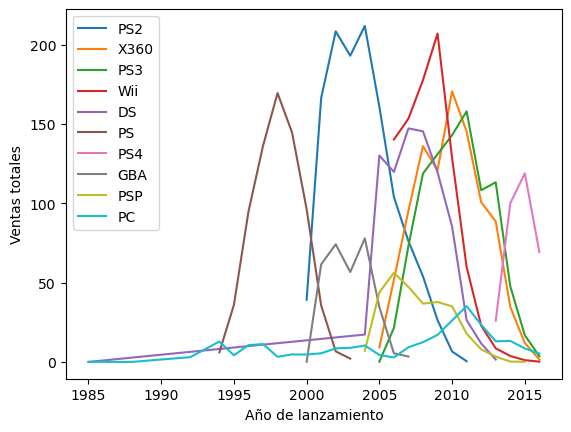

In [100]:
# Crear una distribución de las ventas por año de nuestras plataformas top 10
for platform in top_10_platforms:
    platform_data = sales[sales['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    yearly_sales.plot(label=platform)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend()
plt.show()

Es interesante ver como cuando las ventas de los videjuegos de ciertas consolas ya iban practiamente a llegar fondo es cuando salía una plataforma más moderna, es una tendencia que se practicamente en todas las consolas, a excepción de los juegos de PC que se mantienen realmente constantes.

In [101]:
# Plataformas que solían ser populares pero que ahora no tienen ventas

# Identificar las plataformas con el mayor número de ventas por todos los años
total_sales = sales.groupby('platform')['total_sales'].sum()
popular_platforms = total_sales.sort_values(ascending=False).index

# Ver si las plataformas anteriores tienen ventas en el año mas reciente
current_year = sales['year_of_release'].max()
sales_current_year = sales[sales['year_of_release'] == current_year]

platforms_no_sales = []
for platform in popular_platforms:
    if platform not in sales_current_year['platform'].unique():
        platforms_no_sales.append(platform)

print("Plataformas populares sin ventas actuales:", platforms_no_sales)

Plataformas populares sin ventas actuales: ['PS2', 'DS', 'PS', 'GBA', 'PSP', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', '2600', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX']


In [102]:
# Analizar la vida útil de las plataformas
platform_lifespan = sales.groupby('platform')['year_of_release'].max() - sales.groupby('platform')['year_of_release'].min()
average_lifespan = platform_lifespan.mean()
print("Vida promedio de una plataforma:", average_lifespan)

Vida promedio de una plataforma: 8.225806451612904


In [103]:
# Determinar para que periodo tomar datos

# Obtener el año mas reciente
max_year = sales['year_of_release'].max()

# Filtrar la dataframe que incluya solamente las plataformas con la vida promedio
sales_to_use = sales[sales['year_of_release'] > max_year - average_lifespan]



In [104]:
# Revisar el nuevo dataset que vamos a utilizar
sales_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 2 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8193 non-null   object 
 1   platform         8193 non-null   object 
 2   year_of_release  8193 non-null   int64  
 3   genre            8193 non-null   object 
 4   na_sales         8193 non-null   float64
 5   eu_sales         8193 non-null   float64
 6   jp_sales         8193 non-null   float64
 7   other_sales      8193 non-null   float64
 8   critic_score     8193 non-null   float64
 9   user_score       8193 non-null   object 
 10  rating           8193 non-null   object 
 11  total_sales      8193 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 832.1+ KB


In [105]:

# Plataformas con las ventas más altas
total_sales = sales_to_use.groupby('platform')['total_sales'].sum()
sales_leaders = total_sales.sort_values(ascending=False).head(12)
print("Lideres en ventas:", sales_leaders.index)

# Identificar plataformas con ventas en aumento
sales_by_year = sales_to_use.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
increasing_sales_platforms = sales_by_year.loc[:, sales_by_year.diff().iloc[-1] > 0].columns
print("Plataformas con ventas en aumento:", increasing_sales_platforms)

# Identificar plataformas con ventas en disminución
decreasing_sales_platforms = sales_by_year.loc[:, sales_by_year.diff().iloc[-1] < 0].columns
print("Plataformas con ventas en disminución:", decreasing_sales_platforms)



Lideres en ventas: Index(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'XOne', 'PC', 'PSP', 'PS2',
       'WiiU', 'PSV'],
      dtype='object', name='platform')
Plataformas con ventas en aumento: Index([], dtype='object', name='platform')
Plataformas con ventas en disminución: Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')


Con esta información vemos que practicamente todas las ventas de las plataformas estan en descenso sin embargo considerando que una plataforma tiene una vida de 8 años desde su lanzamiento , tenemos que ver cuales tienen todavia potencial de ventas considerando que estamos planeando hacer un pronóstico para el 2017. En la parte de abajo creo una distribución para ver que plataformas acaban de salir. 

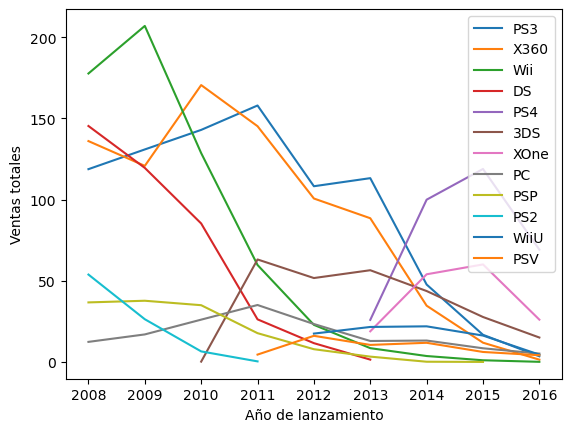

In [106]:
# Crear una distribución de las ventas por año de nuestras lideres en ventas
for platform in sales_leaders.index:
    platform_data2 = sales_to_use[sales_to_use['platform'] == platform]
    yearly_sales2 = platform_data2.groupby('year_of_release')['total_sales'].sum()
    yearly_sales2.plot(label=platform)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend()
plt.show()

Con base en la gráfica anterior vemos que la plataforma PS4 y xboxone salieron en el 2013, y si bien sus ventas están en descenso todavia le queda potencial de mercado hasta el 2021. También se ve que historicamente las plataformas de PS y xbox han tenido la mayor cantidad de ventas. En análisis anteriores vimos como aproximandamente unos tres años antes de que se cumpla el plazo promedio de 8 años de duración de una plataforma, se saca una plataforma más reciente.


Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


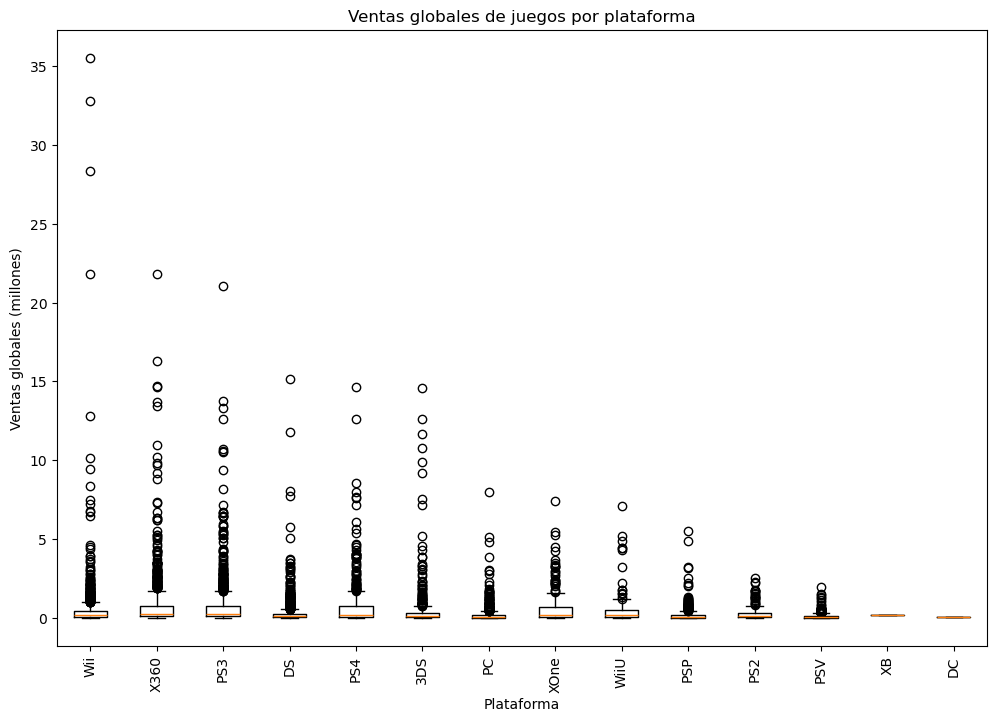

In [107]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 8))
plt.boxplot([sales_to_use[sales_to_use['platform'] == platform]['total_sales'] for platform in sales_to_use['platform'].unique()])
plt.xticks(range(1, len(sales_to_use['platform'].unique()) + 1), sales_to_use['platform'].unique(), rotation=90)
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.title('Ventas globales de juegos por plataforma')
plt.show()

Se aprecia como las ventas promedio de las plataformas parece se parecida, depende mucho del momento en que se encuentra cada una y si sacan versiones más modernas, también si tiene poco tiempo que salio al mercado o si ya se acerque a los 8 años que dura en promedio una plataforma. También tenemos muchos valores atípicos que pueden ser los juegos que son únicos en cada plataforma y más esperados. Se aprecia como la plataforma xbox360 y ps3 son los que más ventas tienen

**************************

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [108]:
# Transformar la columna user_score a float
sales_to_use['user_score'] = sales_to_use['user_score'].astype(float)

/var/folders/8x/vjvsm00d2tqc_t6b_jbfcknh0000gn/T/ipykernel_21254/3699022935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_to_use['user_score'] = sales_to_use['user_score'].astype(float)


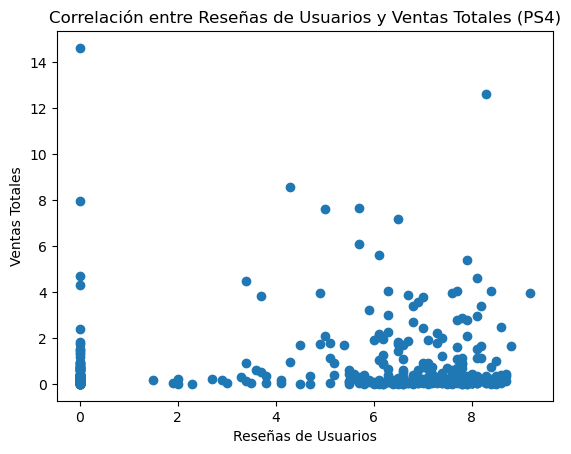

Correlación entre Reseñas de Usuarios y Ventas Totales (PS4): 0.11311562450852876


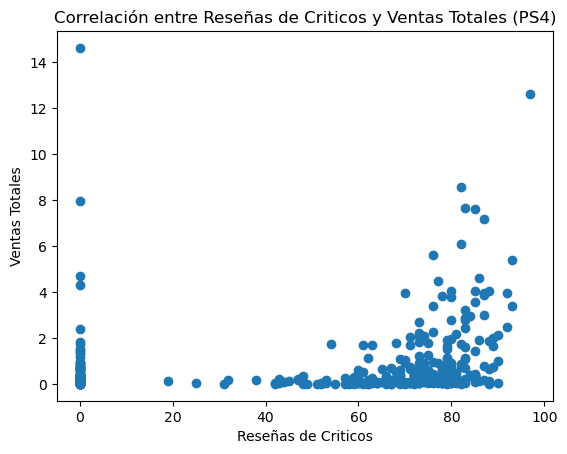

Correlación entre Reseñas de Criticos y Ventas Totales (PS4): 0.22754960627752685


In [109]:
# Filtrar los datos para la plataforma PS4
ps4_data = sales_to_use[sales_to_use['platform'] == 'PS4']

# Crear el gráfico de dispersión para user_score vs total_sales
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales')
plt.title('Correlación entre Reseñas de Usuarios y Ventas Totales (PS4)')
plt.show()

# Calcular la correlación para user_score vs total_sales
user_score_correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Correlación entre Reseñas de Usuarios y Ventas Totales (PS4):', user_score_correlation)

# Crear el gráfico de dispersión para critic_score vs total_sales
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.xlabel('Reseñas de Criticos')
plt.ylabel('Ventas Totales')
plt.title('Correlación entre Reseñas de Criticos y Ventas Totales (PS4)')
plt.show()

# Calcular la correlación para critic_score vs total_sales
critic_score_correlation = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Correlación entre Reseñas de Criticos y Ventas Totales (PS4):', critic_score_correlation)


Vamos a interpretar los resultados obtenidos por los diagramas de dispersión y la ventas totales

* Reseñas usarios vs total ventas: En el gráfico los puntos estan muy dispersos, no se nota una tendencia marcada, y esto igual se comprueba cuando hacemos la prueba de correlación, en donde el resultado es de 0.1131. Como dato , mientra más cerca el valor este de 1 o -1 señalaria una relación fuerte positiva o negativa como fuera el caso.

* Reseñas criticos vs total ventas: En el gráfico se muentra una tendencia positiva levemente marcada, igual esto se comprueba en en la prueba de correlación, en donde el resultado es de 0.2275. Sin embargo, sigue siendo débil la relación.

**************************

Teniendo en las conclusiones anteriores compararé las ventas de los mismos juegos en otras plataformas

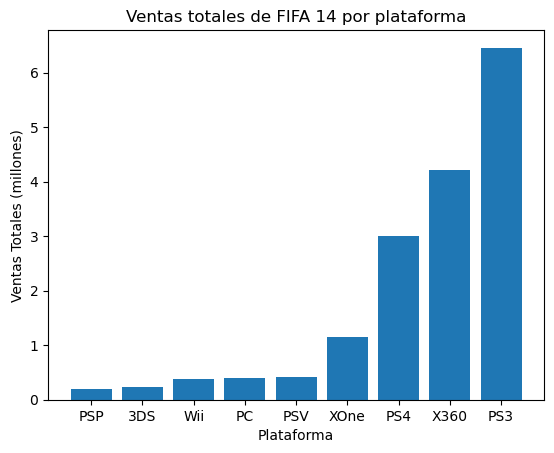

In [110]:
# Revisar el comportamiento de las ventas de FIFA 14 por plataforma
game_data = sales_to_use[sales_to_use['name'] == 'FIFA 14']

# Ordenar los datos por total_sales para una mejor visualización
game_data = game_data.sort_values('total_sales')

# Crear una gráfica de barras con las plataformas en el eje x y las ventas totales en el eje y
plt.bar(game_data['platform'], game_data['total_sales'])

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.title('Ventas totales de FIFA 14 por plataforma')

# Mostrar la gráfica
plt.show()

In [111]:
# Calcular el promedio de reseñas de usuarios para FIFA 14 por plataforma
fifa14_game = sales_to_use[sales_to_use["name"] == "FIFA 14"]
average_per_platform = fifa14_game.groupby('platform')['user_score'].mean()
print("Promedio de reseñas de usuarios para FIFA 14:", average_per_platform.sort_values(ascending=False))

Promedio de reseñas de usuarios para FIFA 14: platform
PS4     6.3
XOne    5.8
PC      4.6
PS3     4.3
Wii     4.3
X360    4.2
PSP     3.4
PSV     1.8
3DS     0.0
Name: user_score, dtype: float64


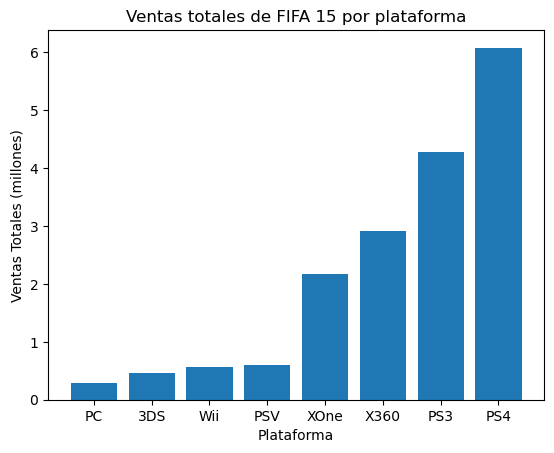

In [112]:
# Revisar el comportamiento de las ventas de FIFA 15 por plataforma
game_data = sales_to_use[sales_to_use['name'] == 'FIFA 15']

# Ordenar los datos por total_sales para una mejor visualización
game_data = game_data.sort_values('total_sales')

# Crear una gráfica de barras con las plataformas en el eje x y las ventas totales en el eje y
plt.bar(game_data['platform'], game_data['total_sales'])

# Agregar etiquetas al eje x y al eje y
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.title('Ventas totales de FIFA 15 por plataforma')

# Mostrar la gráfica
plt.show()

In [113]:
# Calcular el promedio de reseñas de usuarios para FIFA 15 por plataforma

fifa15_game = sales_to_use[sales_to_use["name"] == "FIFA 15"]
average_per_platform = fifa15_game.groupby('platform')['user_score'].mean()
print("Promedio de reseñas de usuarios para FIFA 15:", average_per_platform.sort_values(ascending=False))


Promedio de reseñas de usuarios para FIFA 15: platform
PS4     5.7
XOne    5.4
PS3     4.5
Wii     4.3
PC      4.2
X360    4.2
PSV     3.1
3DS     2.4
Name: user_score, dtype: float64


Se puede apreciar como las calificaciones promedios que dieron los usuarios de los juegos FIFA 14 y FIFA 15 parece no tener realmente una relación directa en la cantidad de ventas que se tiene en cada plataforma. Mas bien , puede ser que más bien se compra esos juegos en específico en ciertas plataformas por otros factores.


********************************

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


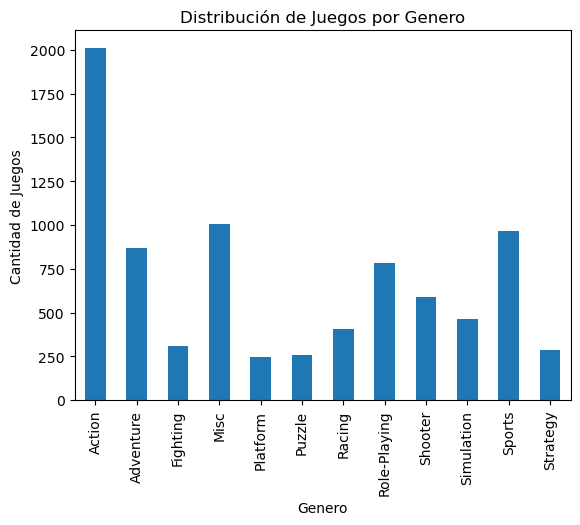

In [114]:
# Agrupar los datos por género y contar el número de ocurrencias para cada juego
game_distribution = sales_to_use.groupby('genre')['name'].count()

# Graficar la distribución de juegos por género
game_distribution.plot(kind='bar')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Juegos por Genero')
plt.show()



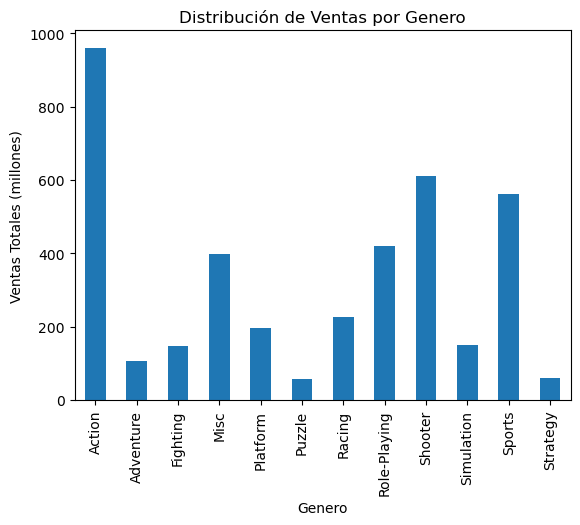

In [115]:
# Agrupar los datos por género y sumar las ventas totales
game_sales = sales_to_use.groupby('genre')['total_sales'].sum()

# Graficar la distribución de juegos por genero y en relación a las ventas totales
game_sales.plot(kind='bar')
plt.xlabel('Genero')
plt.ylabel('Ventas Totales (millones)')
plt.title('Distribución de Ventas por Genero')
plt.show()

La cantidad de juegos que hay de acción y las ventas en dicha categoría tiene una relación directamente proporcional, sin embargo, este comportamiento no se en todas las categorías. Por ejemplo, la cantidad de juegos de la categoria Shooter es menor que varias categorías sin embargo genera más venta que todas las demás (sin sobrepasar la de acción claro)

Con la información anterior se pueden sacar conclusiones importantes, por ejemplo, desde el punto de vista de los desarrolladores de juegos, invertir más capital en la categoría shooter no tanto en la cantidad de juegos sino en la calidad de los mismos, ya que genera más ventas que muchas otras categorías por ejemplo Role-Playing,Strategy y Fighting. Y por el lado de la tienda online, trasladar más presupuesto de marketing a los juegos de la categoría shooter que a otros juegos, incluyendo inclusive el tipo de acuerdo comercial que se tienen con la empresas que los crean. 

## Crear un perfil de usuario por cada región

Para cada región (NA, UE, JP) determina:

* Las cinco plataformas principales.
* Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [116]:
# Las 5 plataformas con mayores ventas en Norteamérica, Europa y Japón
top_five_na_sales = sales.groupby('platform')['na_sales'].sum().nlargest(5)
top_five_eu_sales = sales.groupby('platform')['eu_sales'].sum().nlargest(5)
top_five_jp_sales = sales.groupby('platform')['jp_sales'].sum().nlargest(5)

top_five_platforms = pd.concat([top_five_na_sales, top_five_eu_sales, top_five_jp_sales], axis=1)
top_five_platforms.columns = ['na_sales', 'eu_sales', 'jp_sales']

top_five_platforms


,na_sales,eu_sales,jp_sales
platform,,,
X360,599.15,269.79,NaN
PS2,580.09,337.05,137.74
Wii,494.01,261.48,NaN
PS3,391.60,328.97,NaN
DS,381.38,NaN,175.02
PS,NaN,212.39,139.78
SNES,NaN,NaN,116.55
3DS,NaN,NaN,100.64


Se aprecia como mientras que en ciertas plataformas unas regiones tienen la mayor cantidad de ventas como es Norteamérica y Europa con el X360, esa consola en la región de Japón no esta en sus 5 principales plataformas. Y por otro lado, en Japón su plataforma SNES en su cuarto lugar de ventas , en las demás regiones ni siquiera esta en tu top 5.

In [117]:
# Los 5 géneros con mayores ventas en Norteamérica, Europa y Japón
top_five_na_sales2 = sales.groupby('genre')['na_sales'].sum().nlargest(5)
top_five_eu_sales2 = sales.groupby('genre')['eu_sales'].sum().nlargest(5)
top_five_jp_sales2 = sales.groupby('genre')['jp_sales'].sum().nlargest(5)

top_five_genres = pd.concat([top_five_na_sales2, top_five_eu_sales2, top_five_jp_sales2], axis=1)
top_five_genres.columns = ['na_sales', 'eu_sales', 'jp_sales']

top_five_genres

,na_sales,eu_sales,jp_sales
genre,,,
Action,873.70,517.58,160.15
Sports,681.69,375.60,135.27
Shooter,590.35,316.96,NaN
Platform,444.44,NaN,130.71
Misc,401.69,211.32,108.04
Racing,NaN,235.47,NaN
Role-Playing,NaN,NaN,353.88


Comparando las ventas de cada región con base en el género de los juegos, vemos como mientras en Norteamérica y Europra el genero acción es el que más ventas tiene, en Japón es el Role-Playing. Con esta información, se pueden crear estrategias de marketing focalizadas por región con base en el tipo de género que más se vende o que los usuarios buscan.

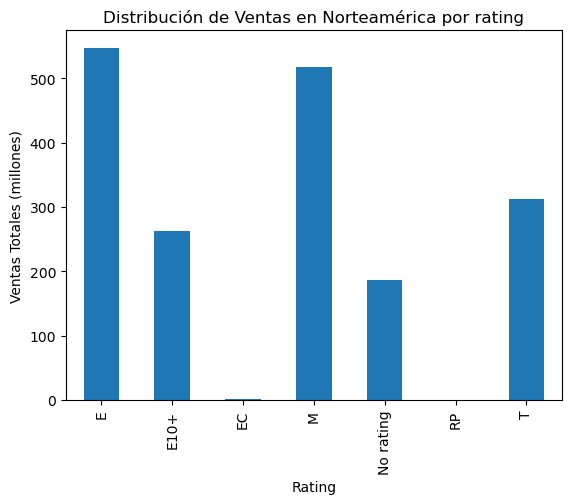

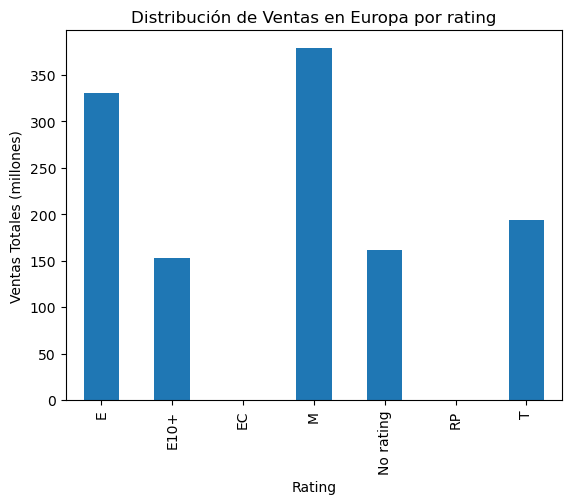

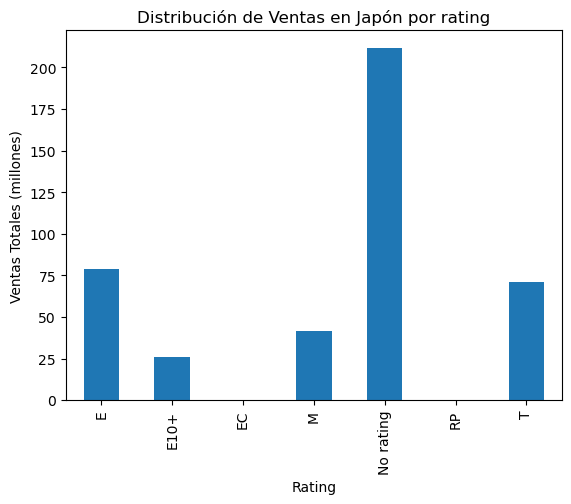

In [118]:

# Distribución de las ventas en Norteamérica, Europa y Japón por rating
na_rating = sales_to_use.groupby("rating")["na_sales"].sum()

na_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Ventas Totales (millones)')
plt.title('Distribución de Ventas en Norteamérica por rating')
plt.show()

eu_rating = sales_to_use.groupby("rating")["eu_sales"].sum().plot(kind="bar")

eu_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Ventas Totales (millones)')
plt.title('Distribución de Ventas en Europa por rating')
plt.show()

jp_rating = sales_to_use.groupby("rating")["jp_sales"].sum().plot(kind="bar")

jp_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Ventas Totales (millones)')
plt.title('Distribución de Ventas en Japón por rating')
plt.show()




Para que pueda quedar más claro las gráficas anteriores aqui pongo el significado de la clasificación ESRB

1. Infantil (EC - Early Childhood):

* Juegos adecuados para niños de 3 años en adelante.
* El contenido puede incluir violencia mínima, fantasía o violencia suave.

2. Para Todos (E - Everyone):

* Juegos adecuados para todas las edades.
* El contenido puede contener violencia mínima, fantasía o violencia suave y/o uso poco frecuente de lenguaje suave.

3. Para Todos 10+ (E10+ - Everyone 10+):

* Juegos adecuados para personas de 10 años en adelante.
* El contenido puede contener más violencia de dibujos animados, fantasía o violencia suave, lenguaje suave y/o temas sugerentes mínimos.

4. Adolescentes (T - Teen):

* Juegos adecuados para personas de 13 años en adelante.
* El contenido puede incluir violencia, temas sugestivos, humor grosero, sangre mínima, apuestas simuladas y/o uso poco frecuente de lenguaje fuerte.

5. Maduro (M - Mature):

* Juegos adecuados para personas de 17 años en adelante.
* El contenido puede incluir violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte.

6. Solo Adultos (AO - Adults Only):

* Juegos adecuados solo para adultos de 18 años en adelante.
* El contenido puede incluir escenas prolongadas de violencia intensa, contenido sexual gráfico y/o juego con moneda real.

7. Clasificación Pendiente (RP - Rating Pending):

* Indica que un juego ha sido presentado al ESRB y está esperando una clasificación final.

Las gráficas anteriores nos pueden ayudar a segmentar los mercados con base al tipo de usuarios que generan la mayor cantidad de compras en cada región

## Prueba de hipótesis

Vamos a realizar dos pruebas de hipótesis


Primera prueba

Hipótesis nula(H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis alternativa(H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

In [119]:
# Extraer las reseñas de usuarios para XOne y PC
xone_scores = sales_to_use[sales_to_use['platform'] == 'XOne']['user_score']
pc_scores = sales_to_use[sales_to_use['platform'] == 'PC']['user_score']

# Realizar la prueba t de student
# H0: Las puntuaciones medias de los usuarios para XOne y PC son iguales
# h1: Las puntuaciones medias de los usuarios para XOne y PC son diferentes
t_statistic, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Definir el valor alpha
alpha = 0.05

# Imprimir los resultados
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretar los resultados
if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

T-Statistic: -1.9566469102240367
P-Value: 0.05102717269308569
No podemos rechazar la hipótesis nula


En la primer prueba de hipótesis, estadísticamente no se pudo rechazar la hipótesis nula que es que las puntuaciones medias de los usuarios para XOne y PC son iguales, aunque estuvimos cerca ya que para rechazarla el P-value tuvo que ser menos a nuestro umbral alpha 0.05

***********************

Segunda prueba

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Hiótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [120]:
# Extraer las reseñas de usuarios para XOne y PC
action_scores = sales_to_use[sales_to_use['genre'] == 'Action']['user_score']
sports_scores = sales_to_use[sales_to_use['genre'] == 'Sports']['user_score']

# Realizar la prueba t de student
# H0: Las puntuaciones medias de los usuarios para el genero Acción y Deportes son iguales
# h1: Las puntuaciones medias de los usuarios para el genero Acción y Deportes son diferentes
t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Definir el valor alpha
alpha = 0.05

# Imprimir los resultados
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretar los resultados
if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

T-Statistic: 3.8877662473763226
P-Value: 0.00010444655536335578
Rechazamos la hipótesis nula


En la segunda prueba de hipótesis, estadísticamente se pudo rechazar la hipótesis nula que es que las puntuaciones medias de los usuarios para el genero Acción y Deportes son iguales, entonces, aceptaríamos al hipótesis alternativa que dice que son diferentes.

## Conclusión general

Después de realizar el análisis en el comportamiento de la vengas de videojuegos online en las regiones de Norteamérica, Europa y Japón pudimos obtener conclusiones muy valiosas que nos ayudarán a determinar las estrategias de marketing para el 2017.

Sabemos cuales son los genéneros más vendidos, en que plataformas y en que regiones del mundo, también la relación que tienen con las ventas las clasificaciones establecidas por el ESRB y las reseñas de usuarios y criticos de la industria. Podriamos inclusive ver que tanta influencia tienen estas reseñas en la venta de ciertos videojuegos , y con ello ver si es una variable de peso o no al momento de planear las estrategias de marketing.

También pudimos determinar la vida media util de una plataforma y el comportamiento del lanzamiento de los videojuegos en cada una con relación a ello. Se apreció como las plataformas lideres en el mercado tienen tendencias muy parecidas tanto en el momento en que sale un nuevo modelo de plataforma como cuando se esta acercando al fin de su vida útil.

Con base en todos los análisis realizados en este estudio tenemos suficiente información para poder planear una estrategia de marketing exitosa para el 2017.

